In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import numba as nb

<Figure size 720x720 with 0 Axes>

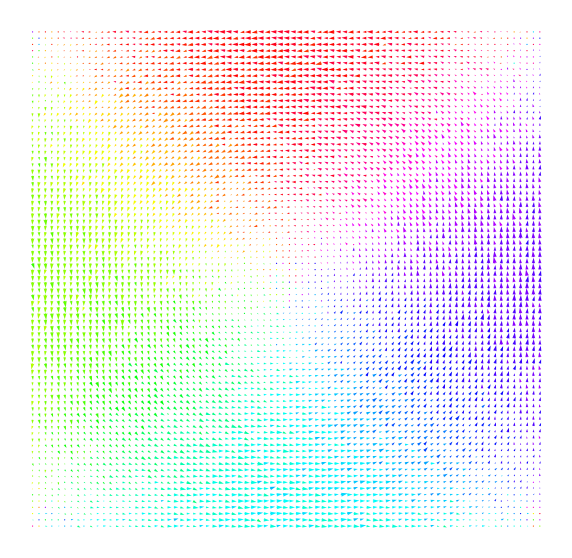

In [9]:
resolution = 80
R = resolution
# Create 2 arrays representing the x and y coordinates of each position in a grid
x, y = np.meshgrid(*[np.linspace(0, 1, R)]*2)

# Generate associated vector field (components are u and v)
u = np.sin(np.pi * x) * np.cos(np.pi * y)+np.random.normal(0, 0.1, [R, R])
v = -np.cos(np.pi * x) * np.sin(np.pi * y)+np.random.normal(0, 0.1, [R, R])

# Define figure parameters
fig = plt.figure(figsize=(10,)*2)
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()

# Refer to https://stackoverflow.com/a/40026959/10940584
norm = matplotlib.colors.Normalize()
colors = np.arctan2(u, v)
norm.autoscale(colors)
cmap = matplotlib.cm.inferno(norm(colors))

# Convert a vector to a scalar representing its length/magnitude (Euclidian norm)
def Norm(a, b):
    return (a ** 2 + b ** 2) ** 0.5

theta = np.angle(np.apply_along_axis(lambda a: complex(*a), 0, np.stack([u, v])))

# Display the generated vector field
ax.quiver(x, y, u, v, theta, cmap='hsv')
plt.axis('off')
plt.show()

[[0.]]


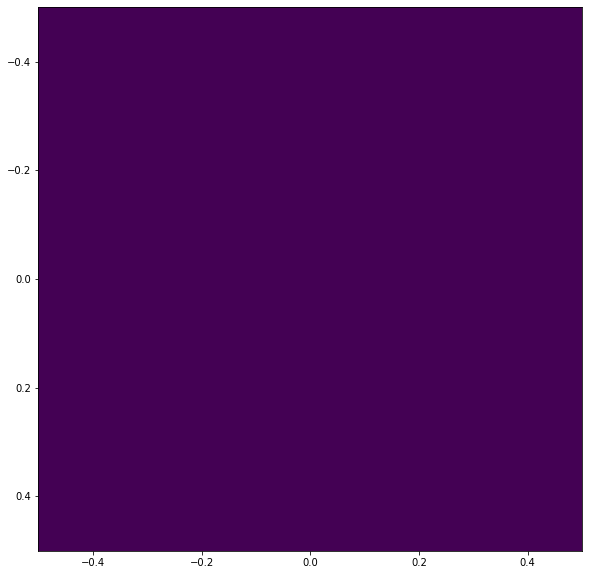

In [152]:
# Manually define a kernel to be drawn on the canvas as a particle moves through space (e.g., for creating a glow/bloom effect)

# flow = np.stack([u, v]).reshape([R, R, 2])
kernel = [
    [1,2,1],
    [2,4,2],
    [1,2,1],
]
kernel = (np.array(kernel)*2)**2

span = np.linspace(-5, 5, 1) ** 3
# kernel2 = np.meshgrid(span, span)
# print(np.outer(span, span))
# print(span@span.T)

# Automatically create a kernel from a mathematical expression
kernel2 = np.abs(np.outer(span, span))**0.01
# span *= -1
# kernel2 = np.add.outer(span, span) ** 2
# kernel2 = kernel2.max()-kernel2
kernel2 *= -1
kernel2 -= kernel2.min()
plt.imshow(kernel2)
print(kernel2)

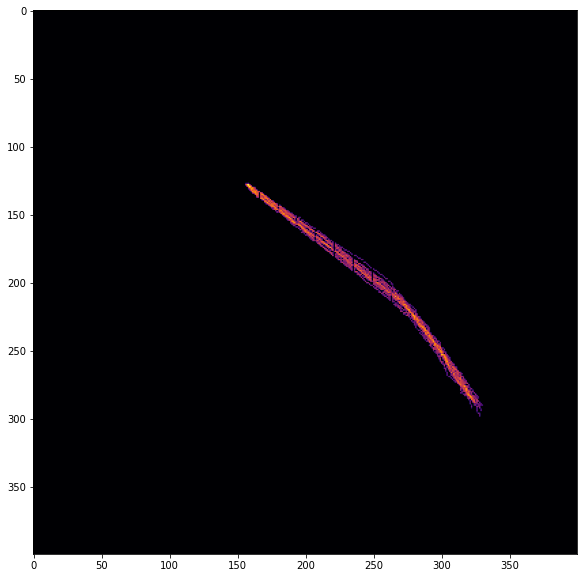

In [790]:
R = 400
particles = 20

field = np.zeros([2, R, R])
# charge = np.zeros([2, 30, 30])
# charge = np.random.uniform(R//4, R//4, [particles, 2])

# Particle starting point
source = np.random.uniform(0, R//2, [2])
# Particle ending point/destination
target = np.random.uniform(R//2, R, [2])

noise = np.random.uniform(0., 1, [particles, 2])
charge = np.full([particles, 2], source) + noise

# simulate as particles?
# for i in range(30):
#     charge[:, tuple(np.random.randint([0,0], charge.shape[1:]))] = 1
canvas = np.zeros([R, R])

# @nb.njit
def clip(x, a=0, b=R-1):
    return np.clip(x, a, b)

# parametrize each particle separately?

def gen_field():
    """
    Generate a function that takes a point and returns a vector representing a particle's motion; the function's parameters will be randomized once (when it is first created) using a function closure
    """
    t = np.random.normal(0., 5., [2])
    def F(p):
        return np.sin(p * t) * 0.5
    return F

F_main = gen_field()

iterations = 200
# Run the simulation
for i in range(iterations):
    # TODO: continuously add more particles
    # TODO: evolving parameters throughout simulation
    for c in range(charge.shape[0]):
        C = charge[c]
#         print(d, flow[tuple(clip(d.astype(np.int)))]*10)
#         print(d)
        
        x, y = d
        r2 = R//2
        q = 0.001
        w = 0.0001
#         delta = np.array([-np.cos(np.pi * (x-r2) * np.random.normal(1, q)), np.sin(np.pi * (y-r2) * np.random.normal(1, q))])*1.4+np.random.normal(0.1, w)
#         delta = np.random.normal(0.1, 0.1, [2])*3

#         dist = np.linalg.norm(target - d)
        dist = np.linalg.norm(target - C)
#         Determine the particle's change in position from one timestep to the next
        delta = ((target - C) / dist) * (200 / iterations) + F_main(C) + np.random.normal(0, 0.02, [2])

        charge[c] += delta #np.array()
#         charge[c] += flow[tuple(clip(d.astype(np.int)))]*10
        charge[c] = clip(charge[c])
#         print(tuple(clip(charge[c].astype(np.int))))
#         v = 1
        v = np.linalg.norm(delta)
#         canvas[tuple(clip(charge[c].astype(np.int)))] += v
        z = clip(charge[c].astype(np.int))
        A = tuple(z-kernel.shape[0]//2)
        B = tuple(z+kernel.shape[1]//2+1)
        
#         print(canvas[A[0]:B[0], A[1]:B[1]])
#         print(kernel2 * v)
#         canvas[A[0]:B[0], A[1]:B[1]] += kernel * v
        canvas[tuple(z)] += v

plt.imshow(canvas**0.5, cmap='inferno')